## Step 1: preprocess data

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
def LoadBatch(filename):
    """ Copied from the dataset website """
    with open(filename, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
def load_data(directory):
    
    # load data as a normalized way
    
    C=10  #number of classes
    X = LoadBatch(directory)[b'data'].transpose()
    # normalize the raw input data
    X_mean = X.mean(axis=1).reshape(-1,1)
    X_std = X.std(axis=1).reshape(-1,1)
    X = (X-X_mean)/X_std
    y = np.array(LoadBatch(directory)[b'labels'])
    #one-hot representation of the label for each image
    Y = np.eye(C, dtype=int)[y].transpose()
    return X, Y, y


In [6]:
Xtr, Ytr, ytr = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/data_batch_1")
X2, Y2, y2 = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/data_batch_2")
X3, Y3, y3 = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/data_batch_3")
X4, Y4, y4 = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/data_batch_4")
X5, Y5, y5 = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/data_batch_5")
Xtr=np.hstack((Xtr,X2,X3,X4,X5))
Ytr=np.hstack((Ytr,Y2,Y3,Y4,Y5))
ytr=np.hstack((ytr,y2,y3,y4,y5))
Xva=Xtr[0:,0:5000]
Yva=Ytr[0:,0:5000]
yva=ytr[0:5000]
Xtr=Xtr[0:,5000:]
Ytr=Ytr[0:,5000:]
ytr=ytr[5000:]
Xte, Yte, yte = load_data("D:/KTH/study/Grade1/P4/DD2424 Deep Learning in Data Science/Assignment/Datasets/test_batch")

## Step2: define some functions in model

In [7]:
def ComputeGradsNumSlow( X, Y, P, W, b, h,lamda):
        
        # centered difference formula 
        
        k = W.shape[0]
        d = X.shape[0]

        grad_W = np.zeros(W.shape)
        grad_b = np.zeros((k, 1))   

        for i in range(len(b)):
            b_try = np.array(b)
            b_try[i] -= h
            c1 = compute_cost(X, Y, W, b_try,lamda)

            b_try = np.array(b)
            b_try[i] += h
            c2 = compute_cost(X, Y, W, b_try,lamda)

            grad_b[i] = (c2-c1) / (2*h)

        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                W_try = np.array(W)
                W_try[i,j] -= h
                c1 = compute_cost(X, Y, W_try, b,lamda)

                W_try = np.array(W)
                W_try[i,j] += h
                c2 = compute_cost(X, Y, W_try, b, lamda)

                grad_W[i,j] = (c2-c1) / (2*h)

        return [grad_W, grad_b]
    
def load_label_names(self):
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        

def ini_parameters(X, Y):
    m=50
    #generate w and b according to the shape of inputs   
    std=np.sqrt(1/X.shape[0]) 
    #std=0.01
    np.random.seed(100)
    W1 = std*np.random.randn(m,X.shape[0])+0
    W2 = std*np.random.randn(Y.shape[0],m)+0
    np.random.seed(100)
    b1 = std*np.random.randn(m,1)+0
    b2 = std*np.random.randn(Y.shape[0],1)+0
    return W1,W2,b1,b2
    
def first_layer(X, W1, b1):
    assert(X.shape[0]== W1.shape[1])
    s1=np.dot(W1, X)+b1
    return s1

def activation(s1):
    #BN?
    h=np.maximum(0,s1)
    return h

def evaluate_classifier(h, W2, b2):
        
    # Write a function that evaluates the network function                                            
    
        assert(h.shape[0]== W2.shape[1])#m nodes
        s2=np.dot(W2, h)+b2
        return  softmax(s2)
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)    


def compute_cost(X, Y, y, W1, W2, b1, b2,lamda,svm=False):
        
    # calculate full loss function
    if svm ==False:
        L = cross_entropy(X, Y,W1, W2,b1,b2)+(np.sum(W1**2)+np.sum(W2**2))*lamda
    elif svm==True:
        L = svm_loss(X, y, W, b)+np.sum(W**2)*lamda
    return L
        
    
def cross_entropy(X, Y, W1, W2,b1,b2):
        
    #define cross entropy loss
    s1=first_layer(X,W1,b1)
    h=activation(s1)
    
    cross_entropy_loss = np.dot(Y.transpose(), evaluate_classifier(h,W2,b2))               
    cross_entropy_loss = np.diag(cross_entropy_loss)
    cross_entropy_loss = -np.log(cross_entropy_loss)
    loss = np.sum(cross_entropy_loss)/ Y.shape[1]
    return loss

def svm_loss(X, y, W, b):
    
    #define svm loss
    
    assert(X.shape[0]== W.shape[1])
    s=np.dot(W, X)+b
    l=np.zeros(s.shape)
    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            l[i][j]= max(0, s[i][j]-s[y[j]][j]+1)
    loss=np.sum(l)/ X.shape[1]
    return loss   
   
    
def compute_accuracy(X, y, W1, W2, b1, b2):
        
  #compute the accuracy of the network prediction
    X=activation(first_layer(X,W1,b1))
    k = np.argmax(evaluate_classifier(X,W2,b2), axis=0)
    acc=0
    for i in range(X.shape[1]):
        if k[i]==y[i]:
            acc+=1
    acc=acc/X.shape[1]
    return acc
        
    
def compute_gradient(X, Y, W1,W2, b1,b2,lamda,svm=False):
         
    #evaluate the gradients of the cost function for a mini-batch
    if svm==False:
        H = activation(first_layer(X,W1,b1))
        P=evaluate_classifier(H, W2, b2)
        g=P-Y
        assert(X.shape[1]== g.shape[1])
        grad_b2 = np.dot(g,np.ones((X.shape[1],1)))/X.shape[1]
        grad_w2 = np.dot(g, H.T)/X.shape[1]+2*lamda*W2
        assert(W2.shape[0]== g.shape[0])
        g=np.dot(W2.T,g)
        assert(g.shape== H.shape)
        g=g*np.where(H>0,1,0)
        grad_b1=np.dot(g,np.ones((X.shape[1],1)))/X.shape[1]
        grad_w1 = np.dot(g, X.T)/X.shape[1]+2*lamda*W1
        return grad_w1,grad_w2, grad_b1, grad_b2
    
    else:
        n = X.shape[1]
        d = X.shape[0]
        K = Y.shape[0]
        gradW = np.zeros((K, d))
        gradb = np.zeros((K, 1))

        for i in range(n):
            x = X[:, i]
            y_int = np.where(Y[:, [i]].T[0] == 1)[0][0]
            s = np.dot(W, X[:, [i]]) + b
            for j in range(K):
                if j != y_int:
                    if max(0, s[j] - s[y_int] + 1) != 0:
                        gradW[j] += x
                        gradW[y_int] += -x
                        gradb[j, 0] += 1
                        gradb[y_int, 0] += -1

        gradW /= n
        gradW += lamda * W
        gradb /= n
        return gradW, gradb


def ComputeGradsNum(X, Y, y, W1, W2, b1, b2, h, lamda):
        
    # finite difference method
    
        m = W1.shape[0]
        d = X.shape[0]
        k = Y.shape[0]

        grad_W1 = np.zeros(W1.shape)
        grad_W2 = np.zeros(W2.shape)
        grad_b1 = np.zeros(b1.shape)
        grad_b2 = np.zeros(b2.shape)

        c = compute_cost(X, Y, y, W1, W2, b1, b2,lamda,svm=False);
        
        
        for i in range(b1.shape[0]):
            
            b_try1 = np.array(b1)
            b_try2 = np.array(b1)
            b_try1[i][0] += h
            b_try2[i][0] -= h
        
            
            c1 = compute_cost(X, Y,y, W1,W2,b_try1,b2,lamda,svm=False)
            c2 = compute_cost(X, Y, y,W1,W2,b_try2,b2,lamda,svm=False)
            grad_b1[i] = (c1-c2) / (2*h)
            
        for i in range(b2.shape[0]):
            
            b_try1 = np.array(b2)
            b_try2 = np.array(b2)
            b_try1[i][0] += h
            b_try2[i][0] -= h
        
            
            c1 = compute_cost(X, Y,y, W1,W2,b1,b_try1,lamda,svm=False)
            c2 = compute_cost(X, Y, y,W1,W2,b1,b_try2,lamda,svm=False)
            grad_b2[i] = (c1-c2) / (2*h)
            
            
        for i in range(W1.shape[0]):
            for j in range(W1.shape[1]):
                W_try = np.array(W1)
                W_try[i,j] += h
                c2 = compute_cost(X, Y, y, W_try,W2, b1,b2,lamda,svm=False)
                grad_W1[i,j] = (c2-c) / h

        for i in range(W2.shape[0]):
            for j in range(W2.shape[1]):
                W_try = np.array(W2)
                W_try[i,j] += h
                c2 = compute_cost(X, Y, y, W1, W_try, b1,b2,lamda,svm=False)
                grad_W2[i,j] = (c2-c) / h

        return [grad_W1,grad_W2, grad_b1,grad_b2]
    
def montage(W):
	""" Display the image for each label in W """
	import matplotlib.pyplot as plt
	fig, ax = plt.subplots(2,5)
	for i in range(2):
		for j in range(5):
			im  = W[5*i+j,:].reshape(32,32,3, order='F')
			sim = (im-np.min(im[:]))/(np.max(im[:])-np.min(im[:]))
			sim = sim.transpose(1,0,2)
			ax[i][j].imshow(sim, interpolation='nearest')
			ax[i][j].set_title("y="+str(5*i+j))
			ax[i][j].axis('off')
	plt.show()

In [8]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    #remember to transpose inputs when using this
    #assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        return inputs[excerpt], targets[excerpt]

## Step3:check gradients 

In [9]:
xmini=Xtr[1:20,1:10]
Ymini=Ytr[:,1:10]
ymini=ytr[1:10]

W1,W2, b1,b2= ini_parameters(xmini, Ymini)

gnw1,gnw2, gnb1, gnb2=ComputeGradsNum(X=xmini, Y= Ymini,y=ymini,  W1=W1, W2=W2, b1=b1,b2=b2, h=1e-5,lamda=0)
gaw1,gaw2, gab1,gab2=compute_gradient(X=xmini, Y= Ymini,  W1=W1,W2=W2,b1=b1,b2=b2,lamda=0,svm=False)
print(gnb2-gab2)
print(gnb2-gab2)
print(gnw1-gaw1)
print(gnw2-gaw2)

[[-1.61027788e-11]
 [ 3.68125253e-11]
 [-1.19584898e-13]
 [-1.63271341e-11]
 [-3.49435064e-12]
 [-1.78358439e-11]
 [ 1.65516906e-11]
 [ 1.65535537e-11]
 [ 3.13062909e-11]
 [-2.93533253e-12]]
[[-1.61027788e-11]
 [ 3.68125253e-11]
 [-1.19584898e-13]
 [-1.63271341e-11]
 [-3.49435064e-12]
 [-1.78358439e-11]
 [ 1.65516906e-11]
 [ 1.65535537e-11]
 [ 3.13062909e-11]
 [-2.93533253e-12]]
[[4.54702505e-08 3.65514955e-08 5.79087417e-08 7.09985609e-08
  6.89043662e-08 6.89961162e-08 6.81270095e-08 6.80846869e-08
  6.55761434e-08 6.65172036e-08 6.58079902e-08 6.67281631e-08
  6.84739266e-08 6.63658246e-08 6.42806711e-08 5.17356119e-08
  4.93928332e-08 5.22480186e-08 4.43501961e-08]
 [1.48342089e-08 1.29436612e-08 1.79998188e-08 2.13071016e-08
  2.13506107e-08 1.99441666e-08 1.91432365e-08 2.19978842e-08
  2.11388179e-08 2.16414315e-08 1.91388276e-08 1.86224089e-08
  1.89289211e-08 1.77518472e-08 1.59581149e-08 1.47228905e-08
  1.34630745e-08 1.64813993e-08 2.48531734e-08]
 [1.90640762e-07 2.2856410

## Step4:build a one hidden layer classifier

In [14]:
class one_hidden_layer_classifier():
    
    def __init__(self, lamda=0, n_epochs=40, n_batch=100, etamin=1e-5,etamax=0.1,k=8, decay_factor=1,svm=False):
    
        self.W1, self.W2, self.b1,self.b2= ini_parameters(Xtr, Ytr)
        self.P = 0
        self.lamda=lamda
        self.n_batch=n_batch
        self.n_epochs=n_epochs
        self.etamin =etamin
        self.etamax=etamax
        self.eta = self.etamin
        self.decay_factor=decay_factor
        self.svm=svm
        self.k=k
    
    def fit(self,Xtr, Ytr, ytr, Xva, Yva, yva):
        
        trainingloss=[]
        validationloss=[]
        trainingaccuracy=[]
        validationaccuracy=[]
        lr=[]
        updatestep=0
        for i in range(self.n_epochs):
            best_model=0
            best_acc=0
            l1=compute_cost(Xtr, Ytr, ytr, self.W1,self.W2, self.b1, self.b2, self.lamda,self.svm)
            trainingloss.append(l1)
            acc=compute_accuracy(Xtr, ytr, self.W1,self.W2, self.b1, self.b2)
            trainingaccuracy.append(acc)
            print("the",format(i),"epoch for training data,"," the loss is", l1, "the accuracy is ",acc)
            l2=compute_cost(Xva, Yva, yva, self.W1,self.W2, self.b1, self.b2, self.lamda,self.svm)
            validationloss.append(l2)
            acc=compute_accuracy(Xva, yva, self.W1,self.W2, self.b1, self.b2)
#             if acc>best_acc:
#                 best_model=i
#                 best_acc=acc
#                 self.best_w=self.W
#                 self.best_b=self.b
            validationaccuracy.append(acc)
            print("the",format(i),"epoch for validation data,"," the loss is", l2, "the accuracy is ",acc)
            
            Xtr, ytr=iterate_minibatches(Xtr.T, ytr, Xtr.shape[1], shuffle=True)
            Xtr=Xtr.T
            Ytr = np.eye(10, dtype=int)[ytr].transpose()
            

            batch_size=Xtr.shape[1]//self.n_batch
            for j in range(batch_size):
                
                x_mini_batch = Xtr.T[j*self.n_batch:(j+1)*self.n_batch]
                Y_mini_batch = Ytr.T[j*self.n_batch:(j+1)*self.n_batch]
                gradw1,gradw2, gradb1,gradb2 = compute_gradient(x_mini_batch.T, Y_mini_batch.T, self.W1,self.W2, self.b1, self.b2, self.lamda,self.svm)
                self.W1-= gradw1*self.eta
                self.b1-= gradb1*self.eta
                self.W2-= gradw2*self.eta
                self.b2-= gradb2*self.eta
                ns=self.k*batch_size
                if i%(2*self.k)<self.k:
                     self.eta =self.etamin + (j+(i%self.k)*batch_size)*(self.etamax-self.etamin)/ns
                else:
                    self.eta =self.etamax - (j+(i%self.k)*batch_size)*(self.etamax-self.etamin)/ns
                lr.append(self.eta)
                updatestep+=1
        x = range(1,self.n_epochs+1)    
        plt.plot(x, trainingloss,  label = "training loss" )
        plt.plot(x, validationloss, label = "validation loss" )
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.title('training and validation loss') 
        plt.show()
        
        x = range(1,self.n_epochs+1)    
        plt.plot(x, trainingaccuracy,  label = "training accuracy" )
        plt.plot(x, validationaccuracy, label = "validation accuracy" )
        plt.xlabel("epoch")
        plt.ylabel("accuracy")
        plt.legend()
        plt.title('training and validation accuracy') 
        plt.show()
        
        x = range(1,updatestep+1)    
        plt.plot(x, lr, label = "eta" )
        plt.xlabel("update step")
        plt.ylabel("learning rate")
        plt.legend()
        plt.title('learning rate') 
        plt.show()
        
        # print(self.W,self.b)
        # montage(self.W)  
        # print("the best model is in",best_model, "the accuracy is",best_acc)
        
    def predict(self, Xte, Yte, yte):
        
        l=compute_cost(Xte, Yte,yte, self.W1,self.W2, self.b1, self.b2, self.lamda,self.svm)
        acc=compute_accuracy(Xte, yte, self.W1,self.W2, self.b1, self.b2)
#         print("the loss is", l, "the accuracy is ",acc)
        return acc

the 0 epoch for training data,  the loss is 2.809953936998885 the accuracy is  0.09917777777777778
the 0 epoch for validation data,  the loss is 2.810186298376135 the accuracy is  0.1016
the 1 epoch for training data,  the loss is 2.2679771462113805 the accuracy is  0.3556666666666667
the 1 epoch for validation data,  the loss is 2.2587779471954543 the accuracy is  0.3594
the 2 epoch for training data,  the loss is 1.9266797734980052 the accuracy is  0.4242222222222222
the 2 epoch for validation data,  the loss is 1.9383447739844555 the accuracy is  0.4128
the 3 epoch for training data,  the loss is 1.7413618892443172 the accuracy is  0.4517333333333333
the 3 epoch for validation data,  the loss is 1.7787546609395326 the accuracy is  0.4396
the 4 epoch for training data,  the loss is 1.6636513331995655 the accuracy is  0.46424444444444446
the 4 epoch for validation data,  the loss is 1.7102851343593355 the accuracy is  0.4394
the 5 epoch for training data,  the loss is 1.68290600983626

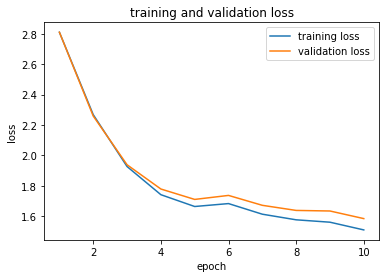

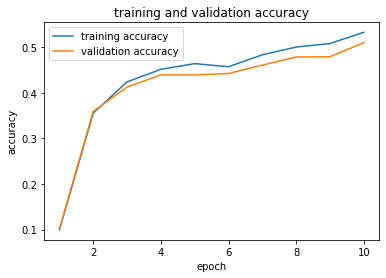

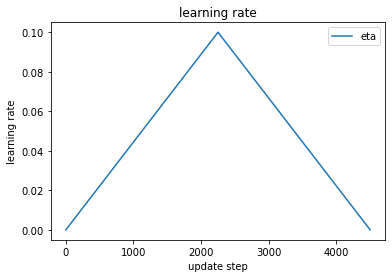

In [19]:
test = one_hidden_layer_classifier(lamda=0.01, n_epochs=10, n_batch=100, etamin=1e-5,etamax=0.1,k=5)
test.fit(Xtr, Ytr, ytr, Xva, Yva, yva)

## step5:find good values

In [21]:
def find_lamda(l_max,l_min,i):
    np.random.seed(i*100)
    l=l_min+(l_max-l_min)* np.random.rand()
    return l

In [28]:
for i in range(10):
    l1=find_lamda(-2,-4,i)
    c=one_hidden_layer_classifier(lamda=10**l1, n_epochs=8, n_batch=100, etamin=1e-5,etamax=0.1,k=2)
    c.fit(Xtr, Ytr, ytr, Xva, Yva, yva)
    print("when l is",l1,"the test accuracy is",c.predict( Xte, Yte, yte))
    i+=1

the 0 epoch for training data,  the loss is 2.3879580953525923 the accuracy is  0.09917777777777778
the 0 epoch for validation data,  the loss is 2.388190456729843 the accuracy is  0.1016
the 1 epoch for training data,  the loss is 1.7721447342799275 the accuracy is  0.3983111111111111
the 1 epoch for validation data,  the loss is 1.7764546533527468 the accuracy is  0.3976
the 2 epoch for training data,  the loss is 1.669225779606023 the accuracy is  0.43404444444444445
the 2 epoch for validation data,  the loss is 1.705989538084528 the accuracy is  0.4198
the 3 epoch for training data,  the loss is 1.4931746081511386 the accuracy is  0.5053111111111112
the 3 epoch for validation data,  the loss is 1.5758724879595103 the accuracy is  0.473
the 4 epoch for training data,  the loss is 1.403822922301221 the accuracy is  0.5378666666666667
the 4 epoch for validation data,  the loss is 1.5131615184329317 the accuracy is  0.4972
the 5 epoch for training data,  the loss is 1.4499100095839923 

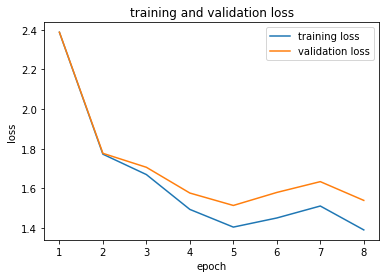

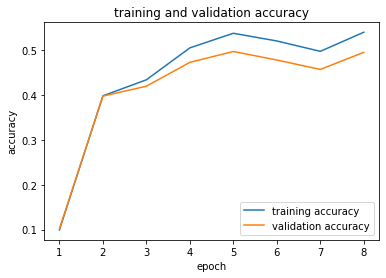

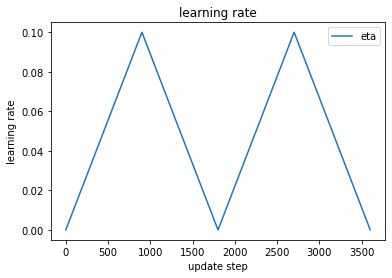

when l is -2.804745984290701 the test accuracy is 0.5114
the 0 epoch for training data,  the loss is 2.384145683966323 the accuracy is  0.09917777777777778
the 0 epoch for validation data,  the loss is 2.3843780453435737 the accuracy is  0.1016
the 1 epoch for training data,  the loss is 1.7693539424619606 the accuracy is  0.39755555555555555
the 1 epoch for validation data,  the loss is 1.7742656022344736 the accuracy is  0.3986
the 2 epoch for training data,  the loss is 1.6301518001226114 the accuracy is  0.44835555555555556
the 2 epoch for validation data,  the loss is 1.672051032087519 the accuracy is  0.433
the 3 epoch for training data,  the loss is 1.4874222674795328 the accuracy is  0.5058
the 3 epoch for validation data,  the loss is 1.5728664390777434 the accuracy is  0.472
the 4 epoch for training data,  the loss is 1.4019275839374827 the accuracy is  0.5383333333333333
the 4 epoch for validation data,  the loss is 1.510928267788772 the accuracy is  0.4946
the 5 epoch for t

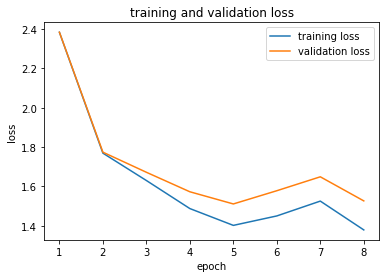

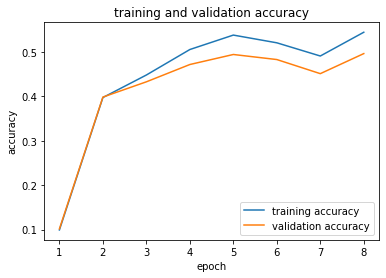

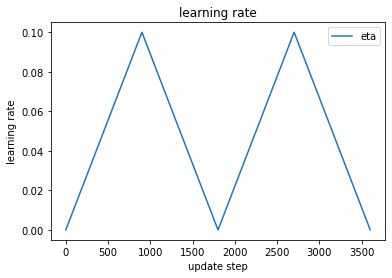

when l is -2.8263802328361383 the test accuracy is 0.5138
the 0 epoch for training data,  the loss is 5.3990133655836985 the accuracy is  0.09917777777777778
the 0 epoch for validation data,  the loss is 5.399245726960949 the accuracy is  0.1016
the 1 epoch for training data,  the loss is 2.1269640794836207 the accuracy is  0.3695555555555556
the 1 epoch for validation data,  the loss is 2.119396741266291 the accuracy is  0.3728
the 2 epoch for training data,  the loss is 1.9656511493924538 the accuracy is  0.36615555555555557
the 2 epoch for validation data,  the loss is 1.95695974234921 the accuracy is  0.3702
the 3 epoch for training data,  the loss is 1.91383441968676 the accuracy is  0.3994888888888889
the 3 epoch for validation data,  the loss is 1.9099579834315108 the accuracy is  0.3972
the 4 epoch for training data,  the loss is 1.8783356085384224 the accuracy is  0.42188888888888887
the 4 epoch for validation data,  the loss is 1.8798733677715684 the accuracy is  0.4226


KeyboardInterrupt: 

In [22]:
for i in range(10):
    l1=find_lamda(-1,-5,i)
    c=one_hidden_layer_classifier(lamda=10**l1, n_epochs=8, n_batch=100, etamin=1e-5,etamax=0.1,k=2)
    c.fit(Xtr, Ytr, ytr, Xva, Yva, yva)
    print("when l is",l1,"the test accuracy is",c.predict( Xte, Yte, yte))
    i+=1

In [23]:
for i in range(10):
    k=i+1
    c=one_hidden_layer_classifier(lamda=10**(-2.82638), n_epochs=2*k, n_batch=100, etamin=1e-5,etamax=0.1,k=k)
    c.fit(Xtr, Ytr, ytr, Xva, Yva, yva)
    print("when ns is",100*k,"the test accuracy is",c.predict( Xte, Yte, yte))
    i+=1

when ns is 100 the test accuracy is 0.4772
when ns is 200 the test accuracy is 0.501
when ns is 300 the test accuracy is 0.5054
when ns is 400 the test accuracy is 0.5112
when ns is 500 the test accuracy is 0.5115
when ns is 600 the test accuracy is 0.519
when ns is 700 the test accuracy is 0.5179
when ns is 800 the test accuracy is 0.518
when ns is 900 the test accuracy is 0.519
when ns is 1000 the test accuracy is 0.5192


In [25]:
for i in range(8):
    k=i+1
    c=one_hidden_layer_classifier(lamda=10**(-2.82638), n_epochs=10*k, n_batch=100, etamin=1e-5,etamax=0.1,k=k)
    c.fit(Xtr, Ytr, ytr, Xva, Yva, yva)
    print("when ns is",100*k,"the test accuracy is",c.predict( Xte, Yte, yte))
    i+=1

when ns is 100 the test accuracy is 0.5157
when ns is 200 the test accuracy is 0.5183
when ns is 300 the test accuracy is 0.5221
when ns is 400 the test accuracy is 0.5205
when ns is 500 the test accuracy is 0.5205
when ns is 600 the test accuracy is 0.5204
when ns is 700 the test accuracy is 0.5261
when ns is 800 the test accuracy is 0.5272


In [ ]:
c=one_hidden_layer_classifier(lamda=10** (-3.195509725199781), n_epochs=20, n_batch=100, etamin=1e-5,etamax=0.1,k=5)
c.fit(Xtr, Ytr, ytr, Xva, Yva, yva)
c.predict(Xte, Yte, yte)